In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1简单函数Simple function

返回一个5 * 5单位矩阵

In [2]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2单变量线性回归Linear regression with one variable

整个2的部分需要根据城市人口数量，预测开小吃店的利润。
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

## 2.1显示数据集Plotting the Data

In [3]:
path = 'Machine_Learning_Ex/machine-learning-ex1/ex1/ex1data1.txt'
data = pd.read_csv(path,header = None,names = ['Population','Profit'])
data.head()
#无字段名标题的数据，header=0会把数据内容的第一行默认为字段名标题；
#header=None指读取文件数据没有列索引

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


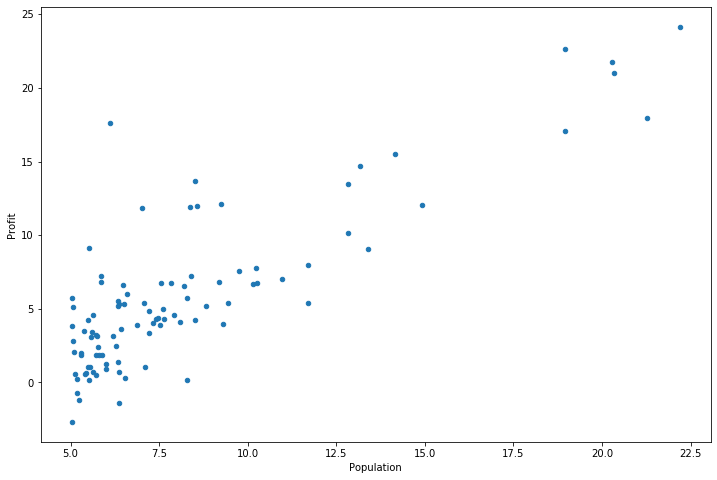

In [4]:
data.plot(kind = 'scatter',x = 'Population',y = 'Profit',figsize = (12,8))
plt.show()

## 2.2梯度下降Gradient Descent 

这个部分在现有数据集上，训练线性回归的参数θ。

### 2.2.1计算公式Equations

 $$ J(\theta) = \frac1{2m}\sum_{i=1}^{m}{\left({h_\theta}(x^{(i)})-y^{(i)}\right)}^2 $$

其中$$ h_\theta(x)=\theta^TX=\theta_0x_0+...+\theta_nx_n $$

In [5]:
#定义代价函数，计算J(θ)，X是矩阵
def computeCost(X,Y,theta):
    inner = np.power((X.dot(theta.T) - Y),2) 
    return np.sum(inner)/(2*len(X))

### 2.2.2实现

数据集已经读取完毕，现在在训练集中添加一列x，用于更新$\theta_0$，然后将$\theta$初始化为0，学习率初始化为0.01，迭代次数为1500.

In [6]:
data.insert(0, 'Ones', 1)

初始化变量

In [7]:
# set X(training data) and y(target variable)
cols = data.shape[1]
X = data.iloc[:, :-1]  # X是data里的除最后列
Y = data.iloc[:, cols - 1: cols]  # Y是data最后一列

观察下X(训练集)和Y(目标变量)是否正确

In [8]:
X.head()  # head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数应该是numpy矩阵，所以需要转换X和Y，然后才能使用它们，我们还需要初始化theta。

In [10]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0]))

查看维度

In [11]:
X.shape, theta.shape, Y.shape

((97, 2), (1, 2), (97, 1))

### 2.3.3计算J(θ)
计算代价函数（theta初始值为0），答案应该是32.07





In [12]:
computeCost(X, Y, theta)

32.072733877455676

### 2.2.4梯度下降
J(θ)通过变化θ的值使得J(θ)变化。
一个检查梯度下降是不是在正常运作的方式是打印出每一步J(θ)的值，看其是不是在一直减小，并且最后收敛至一个稳定的值。
θ最后的结果会用来预测小吃店在35000及70000人城市规模的利润。

$$\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\theta)$$

In [13]:
# 实现θ的更新
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - Y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            theta = temp
            cost[i] = computeCost(X, Y, theta)
            
    return theta, cost

初始化一些附加变量-学习速率alpha和要执行的迭代次数，2.2.2中已经提到

In [14]:
alpha = 0.01
iters = 1500

运行梯度下降算法来将参数θ适合于训练集

In [15]:
g, cost = gradientDescent(X, Y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [16]:
# 预测35000和70000城市规模的小吃摊利润
predict1 = [1, 3.5] * g.T
print("predict1:", predict1)
predict2 = [1, 7] * g.T
print("predict2:", predict2)

predict1: [[0.45197679]]
predict2: [[4.53424501]]


In [17]:
# 使用我们拟合的参数计算训练模型的代价函数(误差)
computeCost(X, Y, g)

4.483388256587726

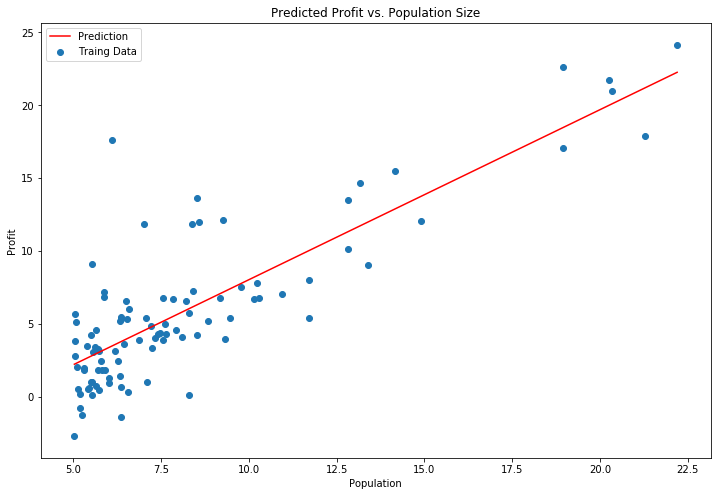

In [18]:
# 绘制线性模型以及拟合的直线
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x) 

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traing Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，可以绘制代价函数。代价总是降低，这是凸优化问题的一个例子。

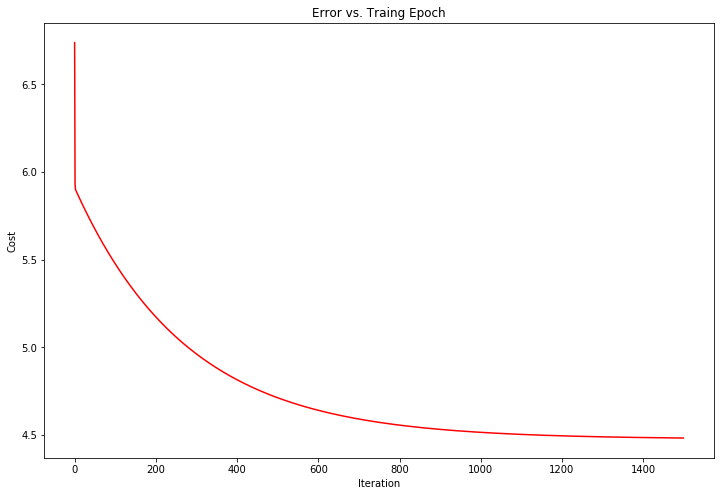

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Traing Epoch')
plt.show()

## 2.4可视化J(θ)
三维图显示$\theta_0$和$\theta_1$与J(θ)的对应关系，J(θ)是一个碗状的图形，并且有全局最小值，这个最小值就是$\theta_0$和$\theta_1$的最优解，梯度下降的每一步都会更接近这个最小值。

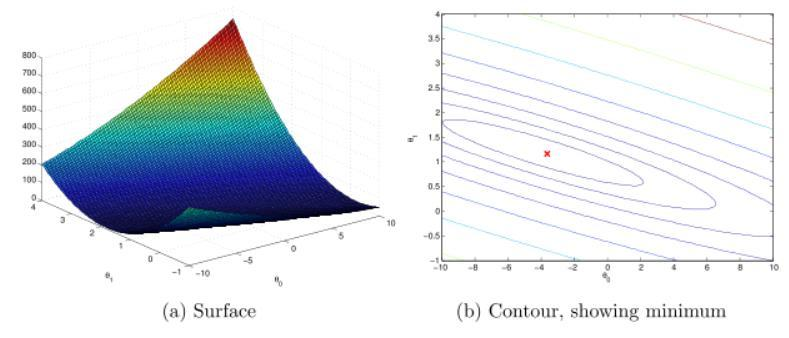

# 3多变量线性回归
ex1 data2.txt里的数据，第一列是房屋大小，第二列是卧式数量，第三列是房屋售价
根据已有数据，建立模型，预测房屋的售价

In [20]:
path = 'Machine_Learning_Ex/machine-learning-ex1/ex1/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 3.1特征归一化
观察数据发现，size变量是bedrooms的1000倍大小，统一量级会让梯度下降收敛的更快。
归一化操作：将每类特征减去他的平均值后除以标准差

In [21]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 3.2梯度下降

In [22]:
# 加一列常数项
data2.insert(0, 'Ones', 1)

# 初始化X和Y
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
Y2 = data2.iloc[:, cols - 1:cols]

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
Y2 = np.matrix(Y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

# 运行梯度下降算法
g2, cost2 = gradientDescent(X2, Y2, theta2, alpha, iters)
g2

matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])

In [23]:
# get the cost (error) of the model
computeCost(X2, Y2, g2)

0.13068670606095903

查看训练过程

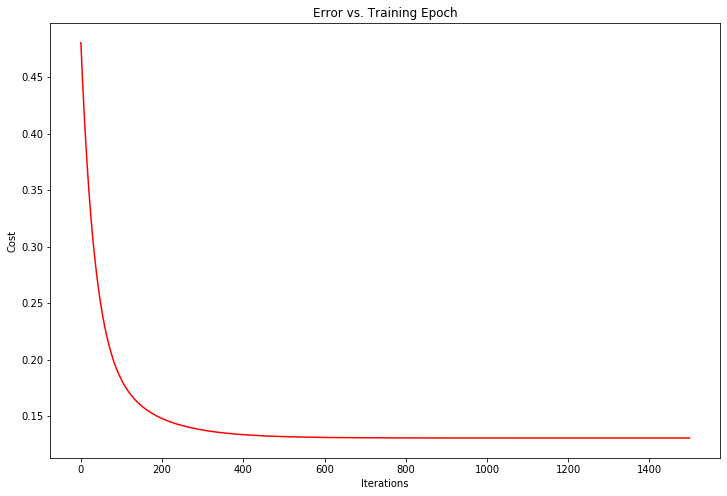

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。将scikit-learn的线性回归算法应用于第一部分的数据，并查看表现。

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

scikit-learn model的预测表现

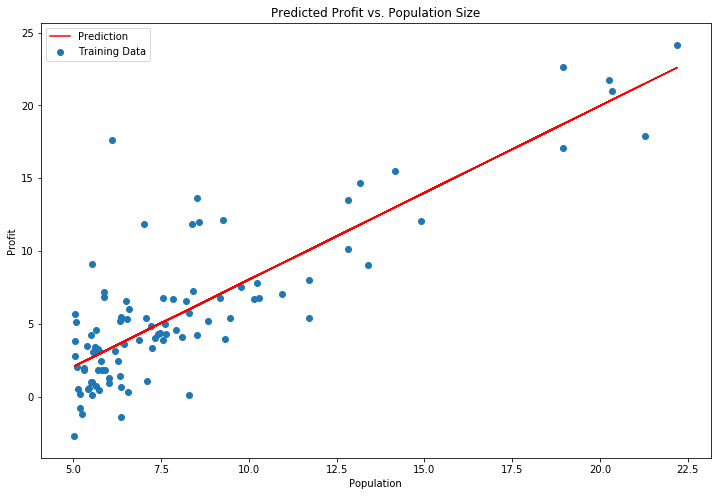

In [26]:
x = np.array(X[:, 1].A1)  # 取X的第一列（初始列为0）并转化成一行
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 3.3正规方程
正规方程是用来找出是的代价函数最小的参数的：$$\frac{\partial}{\partial\theta_j}J(\theta_j)=0$$

假设训练集特征矩阵为X(包含了$x_0=1$)，训练集结果为向量y,则用正规方程解出向量:$$\theta=(X^TX)^{-1}X^Ty$$

梯度下降与正规方程的比较：梯度下降需要学习率$\alpha$，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型。正规方程不需要学习率$\alpha$，一次计算得出，需要计算$(X^TX)^{-1}$，如果特征数量n大则运算代价大，因为逆矩阵的计算时间复杂度为O(n3),只适用于线性模型，不适合逻辑回归模型等其他模型。

In [27]:
# 正规方程
def normalEqn(X, Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y  # @相当于.dot()
    return theta

final_theta2 = normalEqn(X, Y)  # 这里用的是data1的数据
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

在练习2中，我们将看看分类问题的逻辑回归。